# 2. Duplicados y Limpieza de variables sin nulos
- Conversión de Year a fecha 
- Conversión Budget a números
- Eliminación de duplicados

In [1]:
# =========================
# 1️⃣ Librerías core
# =========================
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n  # Para convertir strings numéricos a números

# =========================
# 2️⃣ Configuración de pandas
# =========================
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
# pd.set_option('display.float_format', '{:,.0f}'.format)  # Formato sin notación científica

# =========================
# 3️⃣ Configuración de gráficos
# =========================
sns.set(style="whitegrid")           # Estilo de Seaborn
sns.set_palette("Set2")              # Paleta de colores
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# =========================
# 4️⃣ Configuración general
# =========================
import warnings
warnings.filterwarnings("ignore")  # Ocultar warnings innecesarios


In [2]:
def text_to_num(year):
    """
    Limpiar y convertir a números str sin errores ortográficos ni de puntuación: 
        - Si el valor es un str, lo normaliza dejando todo en minusculas y quitando espacios en los extremos.
        - Después lo convierte a número con la librería w2n, método word_to_num
        - Si no puede devuelve el valor ya normalizado
        - Si no es un str, devuelve el valor original
    """
    # Si es str
    if isinstance(year, str):

        # Normalizamos el str
        year_limpio = year.strip().lower()

        try:
            return w2n.word_to_num(year_limpio)
        
        except ValueError:
            
            # Si no puede leer los números en str devuelve NaN
            return np.nan
        
        except Exception as e:

            # Por si hay cualquier otro tipo de error
            print(f"⚠️ Error inesperado con '{year}': {e}")
            return np.nan
        
    # Si no es str, devuelve el mismo valor   
    else: 
        return year

In [3]:
def clean_budget(num):
        # Quitar espacios al inicio/final
        num = num.strip() 

        # Buscar si hay "M" o "m":
        if re.search(r"[Mm]", num):

            # Quitar "M" o "m" y convertir a int y millones
            clean_num = re.sub(r"[^\d\.]", "", num)
            try:
                return int(clean_num) * 1_000_000
            except:
                return np.nan

        # Buscar si hay "K" o "k":
        if re.search(r"[Kk]", num):

            # Quitar "K" o "k" y convertir a int y miles
            clean_num = re.sub(r"[^\d\.]", "", num)
            try:
                return int(clean_num) * 1_000
            except:
                return np.nan   
            
        # Si no encuentra solo convierte a Int
        else:
            
            try:
                return int(num)
            except:
                return np.nan

In [4]:

# Convertir el csv a DataFrame
df_movies = pd.read_csv(f"../data/raw_movies_dataset.csv")        


In [5]:
df_movies.head()

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000,1.264061e+08,NaN


## 2.1 Duplicados
- Durante el EDA se descubrieron dos duplicados
- Se realiza un .value_counts() de la variable title que funciona como un ID
- Se confirman dos duplicaods mediante [df_movies.duplicated(keep=False)].sort_values("Title")
- Se eliminan los duplicados aplicando .drop_duplicates(inplace=True)
- Comprobación de los cambios realizados con .shape

In [6]:
# Miro los valores que se encuentran dentro de la variable "Title":
#   - encuentro los que están duplicados
#   - compruebo si es necesaria la normalización del texto, NO

df_movies["Title"].value_counts()

Title
The Last Journey        2
Shattered Skies         2
Infinite Dreams         1
Eternal Voyage          1
Broken Destiny          1
Beyond the Stars        1
The Lost Signal         1
Crimson Night           1
Quantum Hearts          1
Solar Storm             1
Iron Legacy             1
Whispers in the Dark    1
Digital Frontier        1
Echoes of Tomorrow      1
Silent Horizon          1
Neon City               1
Forgotten Realm         1
Ocean Whisper           1
Code of Shadows         1
Mystic River            1
Name: count, dtype: int64

In [7]:
# Miro las filas duplicadas con sus originales, compruebo que son realmente duplicados.
# Se puede añadir un .head() en caso de querer escalar a un dataset más grande, para ver los primeros duplicados y empezar a analizar por ahí.

df_movies[df_movies.duplicated(keep=False)].sort_values("Title")

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
17,Shattered Skies,NaN,2008,59000000,2.180626e+08,6.7
21,Shattered Skies,NaN,2008,59000000,2.180626e+08,6.7
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
20,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9


In [8]:
# Elimino los duplicados.

df_movies.drop_duplicates(inplace=True)

In [9]:
# Compruebo las nuevas dimensiones una vez eliminados los duplicados.

df_movies.shape

(20, 6)

## 2.2 Limpieza Year
- Durante el EDA, se identificó que la variable Year era de tipo str y que contenían formatos mixtos.
- Se utiliza la librería word2number (from word2number import w2n) para convertir str en números.
- Se crea la función text_to_num() para detectar los trings que no contienen números y así poder transformarlos.
- Después se convierte el tipo de dato a fecha, aplicando el método pd.to_datetime() y después en año mediante dt.year.
- Se comprueba aplicando .value_counts().sort_index() para ver la distribución de años de forma ordenada.

In [10]:
# Compruebo los valores que se encuentran dentro de la variable "Year"
# Busco una librería para convertir str a numero, siempre y cuando no hayan errores ortográficos ni de puntuación.
# para convertir str en números (from word2number import w2n)
df_movies["Year"].value_counts()

Year
2020            3
2011            2
2007            2
2022            2
2004            1
2018            1
2016            1
2017            1
2000            1
2006            1
2003            1
2019            1
Two Thousand    1
2001            1
2008            1
Name: count, dtype: int64

In [11]:
# Aplico la función a la variable "Year" del DataFrame

df_movies["Year"] = df_movies["Year"].apply(text_to_num)

In [12]:
# Convierto str a datetime y luego a year.

df_movies["Year"] = pd.to_datetime(df_movies["Year"], format="%Y").dt.year

In [13]:
# Compruebo el resultado, ordenando el output por año

df_movies["Year"].value_counts().sort_index()

Year
2000    2
2001    1
2003    1
2004    1
2006    1
2007    2
2008    1
2011    2
2016    1
2017    1
2018    1
2019    1
2020    3
2022    2
Name: count, dtype: int64

## 2.3 Limpieza Budget
- Durante el EDA, se identificó que la variable Budget era de tipo str y que algunos números contenián letras (ejemplo: "20M").
- Se utiliza la librería regex para que encuentre las letras Mm, o Kk.
- Se crea la función clean_budget() para detectar estas letras y convertir el numero a miles o millones según proceda y que lo convierta a int
- Se comprueba el tipo de dato y el porcentaje de nulos para conocer el resultado de los cambios.

In [14]:
# Entro con la última variable en la que no hay valores nulos, veo todos los valores que encuentro dentro
# Este paso no es escalable, pensaría en hacer un .sample() o un .head() o un .tail()

df_movies["Budget"].value_counts()

Budget
59000000     2
11000000     1
202000000    1
215000000    1
180000000    1
123000000    1
160000000    1
99000000     1
102000000    1
152000000    1
178000000    1
25000000     1
211000000    1
31000000     1
80M          1
61000000     1
148000000    1
13000000     1
41000000     1
Name: count, dtype: int64

In [15]:
# Aplico la función 

df_movies["Budget"] = df_movies["Budget"].apply(clean_budget)

In [16]:
df_movies["Budget"].dtype

dtype('int64')

In [17]:
print("\nPorcentaje de nulos:")
display(round(df_movies.isnull().mean() * 100, 2))


Porcentaje de nulos:


Title           0.0
Genre          15.0
Year            0.0
Budget          0.0
Revenue        15.0
IMDB_Rating    20.0
dtype: float64

# 3. OMdB API ("Genre", "IMDB_Rating", "Revenue")
- Durante el EDA se identificaron valores nulos en las siguientes variables: IMDB_Rating, Revenue, Genre
- Se realiza un enriquecimiento de datos mediante OMdB API, permite consultar informacion de peliculas (es necesario tener una API_KEY)
- Se realiza la función fill_omdb() que:
    1. Itera por las filas de las columnas con nulos, 
    2. Cuando detecta uno llama a la api buscando el título de la película,
    3. Si la API responde correctamente, y se encuentra la película
    4. Se rellenan los datos solo cuando realmente esté vacio y la api realmente contenga el dato (no sobreescribe)
    5. Si no lo contiene se devuelve np.nan
    6. En caso de no encontrar la película se imprime un aviso
    7. En caso de errores con la conexión API también se imprime el error

- Se revisan los nulos antes de aplicar la función
- Se aplica la función al df
- Se vuelve a comprobar el porcentaje de nulos

In [18]:
API_KEY = "XXXXXXXXXX"

def fill_omdb(row, columns_to_fill=["IMDB_Rating", "Revenue", "Genre"]):
    """
    Toma una fila de un DataFrame, comprueba si tiene NaN en las columnas especificadas,
    y si es así consulta OMDb por el título y devuelve la fila con los valores rellenados.
    """
    # Si no falta nada, devuelve la fila tal cual
    if not row[columns_to_fill].isnull().any():
        return row

    title = row["Title"]

    url = f"http://www.omdbapi.com/?t={title}&apikey={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if data.get("Response") == "True":
            if pd.isna(row["IMDB_Rating"]) and "imdbRating" in data:
                if data["imdbRating"] != "N/A":
                    row["IMDB_Rating"] = data["imdbRating"]
                    print(f"{title} -> IMDB_Rating: {row["IMDB_Rating"]}")
                else:
                    row["IMDB_Rating"] = np.nan

            if pd.isna(row["Revenue"]) and "BoxOffice" in data:
                if data["BoxOffice"] != "N/A":
                    row["Revenue"] = data["BoxOffice"]
                    print(f"{title} -> Revenue: {row["Revenue"]}")
                else:
                    row["Revenue"] = np.nan

            if pd.isna(row["Genre"]) and "Genre" in data:
                if data["Genre"] != "N/A":
                    row["Genre"] = data["Genre"].split(",")[0].strip()
                    print(f"{title} -> Genre: {row["Genre"]}")
                else:
                    row["Genre"] = np.nan

        else:
            print(f"No encontrado en OMDb: {title}")
            
    else:
        print(f"Error con la API para {title}: {response.status_code}")

    return row

"En este bloque controlo: 
- que solo se rellenen las columnas que están vacías realmente en el DataFrame y 
- que la API realmente devuelva ese dato,
- que imprima cuando no encuentre la película
- que imprima los datos que ha rellenado

Así no se sobreescribe información que ya tenía limpia y evito errores si en la respuesta de la API no está la key."

In [19]:
print("\nPorcentaje de nulos:")
display(round(df_movies.isnull().mean() * 100, 2))


Porcentaje de nulos:


Title           0.0
Genre          15.0
Year            0.0
Budget          0.0
Revenue        15.0
IMDB_Rating    20.0
dtype: float64

In [20]:
df_movies = df_movies.apply(fill_omdb, axis=1)

No encontrado en OMDb: Forgotten Realm
Digital Frontier -> Genre: Documentary
No encontrado en OMDb: Quantum Hearts
Beyond the Stars -> IMDB_Rating: 5.2
No encontrado en OMDb: Shattered Skies
No encontrado en OMDb: Eternal Voyage
Mystic River -> Genre: Crime


# 4. Imputación de nulos restantes
- Revisamos la situacion de las columnas después de los cambios realizados y comrpobamos el porcentage de nulos antes de imputar los nulos restantes

In [21]:
# Reviso la info de las columnas hasta el momento

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        20 non-null     object 
 1   Genre        19 non-null     object 
 2   Year         20 non-null     int64  
 3   Budget       20 non-null     int64  
 4   Revenue      17 non-null     float64
 5   IMDB_Rating  17 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


In [22]:
print("\nPorcentaje de nulos:")
display(round(df_movies.isnull().mean() * 100, 2))


Porcentaje de nulos:


Title           0.0
Genre           5.0
Year            0.0
Budget          0.0
Revenue        15.0
IMDB_Rating    15.0
dtype: float64

## 4.1 Imputación Genre
- NaN se convierten en Unknown, puesto que es imposible saber o sacar un género para una película si no hay una descripción en los datos.

In [23]:
df_movies["Genre"].fillna("Unknown", inplace=True)

In [24]:
print("\nPorcentaje de nulos:")
display(round(df_movies.isnull().mean() * 100, 2))


Porcentaje de nulos:


Title           0.0
Genre           0.0
Year            0.0
Budget          0.0
Revenue        15.0
IMDB_Rating    15.0
dtype: float64

## 4.2 Imputación Revenue
- Una vez ordenados los datos de Budget, se aprecia la relación real Revenue/Budget
- Teniendo clara una tendencia ascendente, se decide imputar por la mediana del ratio (la relación Budget/Revenue)
- Comprobamos mediante scatterplot que la tendencia antes y despúes de imputar

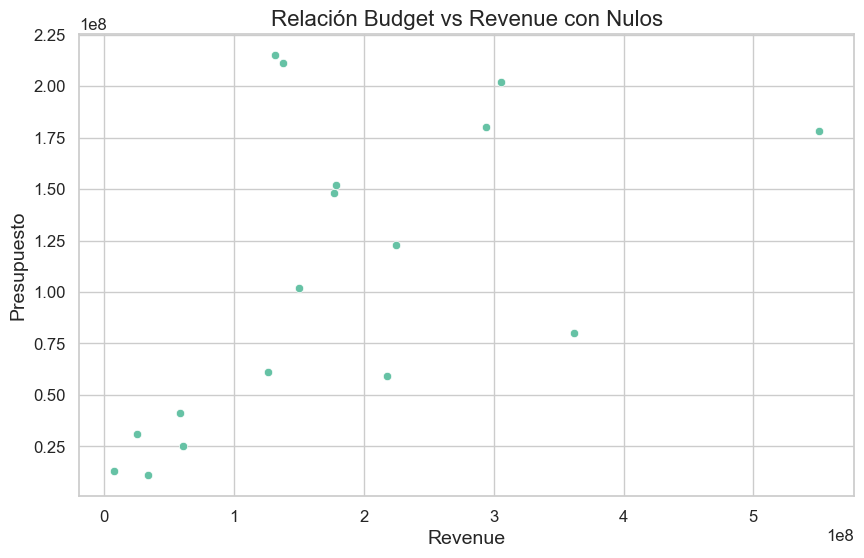

In [25]:
# Con los datos ordenados una vez convertidos a int, podemos ver una clara tendencia ascendente entre Budget y Revenue
# Decido imputar por la mediana los Nulos de Revenue
sns.scatterplot(data=df_movies, y="Budget", x="Revenue")
plt.title("Relación Budget vs Revenue con Nulos")
plt.ylabel("Presupuesto")
plt.xlabel("Revenue")
plt.savefig("../images/null_scatter_budget_revenue.png", dpi=300, bbox_inches="tight")
plt.show()

In [26]:
# Calcular la ratio (la relación) entre Revenue/Budget
df_movies["ratio"] = df_movies["Revenue"] / df_movies["Budget"]

# Despues guardamos la variable Mediana de la Ratio
mediana_ratio = df_movies["ratio"].median()

# Máscara, donde true serán los NaN
mask_nan = df_movies["Revenue"].isna() 

# Imputar (en todas las filas en las que Revenue es NaN, multiplica budget por la ratio mediana)
df_movies.loc[mask_nan, "Revenue"] = df_movies.loc[mask_nan, "Budget"] * mediana_ratio


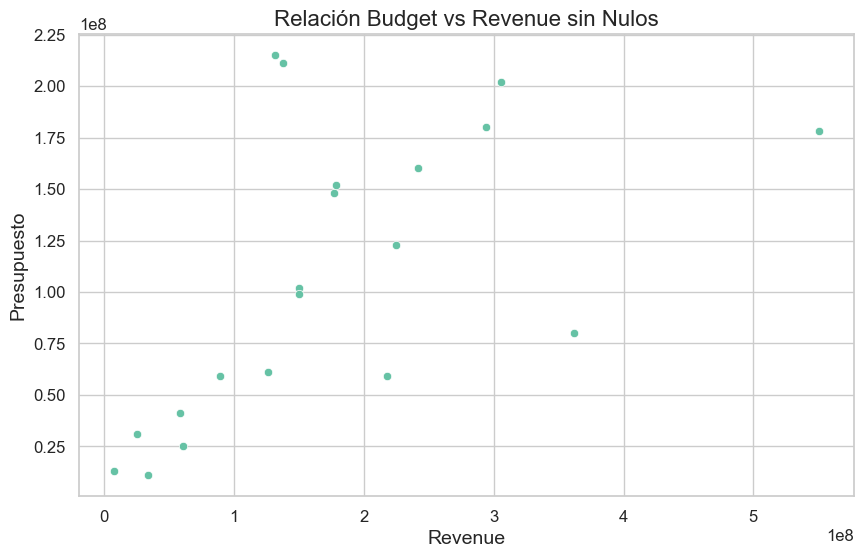

In [27]:
# Una vez realizada la imputación, vemos que los nuevos datos han quedado dentro de la tendencia que ya se podía ver en la relación anterior
sns.scatterplot(data=df_movies, y="Budget", x="Revenue")
plt.title("Relación Budget vs Revenue sin Nulos")
plt.ylabel("Presupuesto")
plt.xlabel("Revenue")
plt.savefig("../images/no_null_scatter_budget_revenue.png", dpi=300, bbox_inches="tight")
plt.show()

In [28]:
print("\nPorcentaje de nulos:")
display(round(df_movies.isnull().mean() * 100, 2))


Porcentaje de nulos:


Title           0.0
Genre           0.0
Year            0.0
Budget          0.0
Revenue         0.0
IMDB_Rating    15.0
ratio          15.0
dtype: float64

## 4.2 Imputación IMDB_Rating
- Para datasets con mayor cantidad de datos, se plantea imputar por la mediana agrupada por género, pero en este caso se considera mejor
- Imputar por la mediana global
- Se realizan comprobaciones antes y después de la imputación
- Se deja al final del bloque el código para una posible imputación agrupando por género

<function matplotlib.pyplot.show(close=None, block=None)>

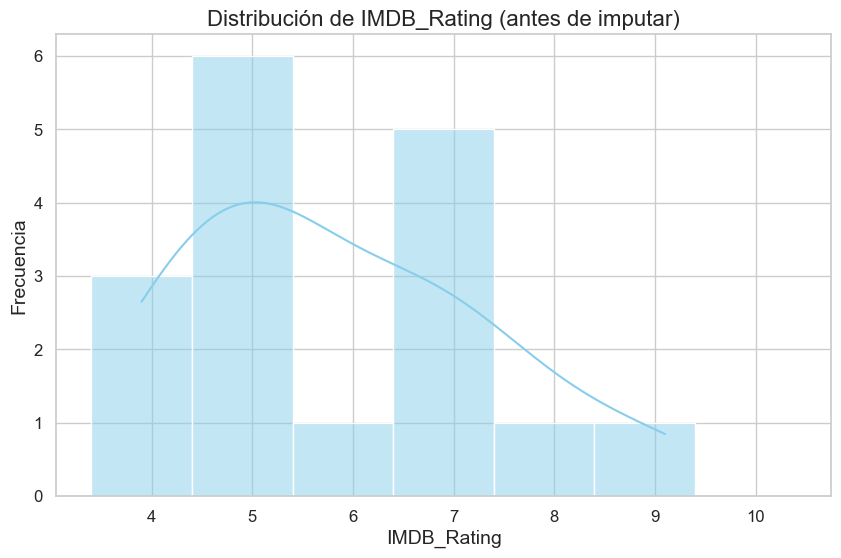

In [29]:
sns.histplot(df_movies["IMDB_Rating"], bins=10, kde=True, color="skyblue")
plt.title("Distribución de IMDB_Rating (antes de imputar)")
plt.xlabel("IMDB_Rating")
plt.ylabel("Frecuencia")
plt.savefig("../images/histplot_rating.png", dpi=300)
plt.show

In [30]:
# 2. Convertir a numérico forzando errores a NaN
df_movies["IMDB_Rating"] = pd.to_numeric(df_movies["IMDB_Rating"], errors="coerce")

# Calcular la mediana global
median_global = df_movies["IMDB_Rating"].median()

# Imputar NaN con esa mediana
df_movies["IMDB_Rating"] = df_movies["IMDB_Rating"].fillna(median_global)

<function matplotlib.pyplot.show(close=None, block=None)>

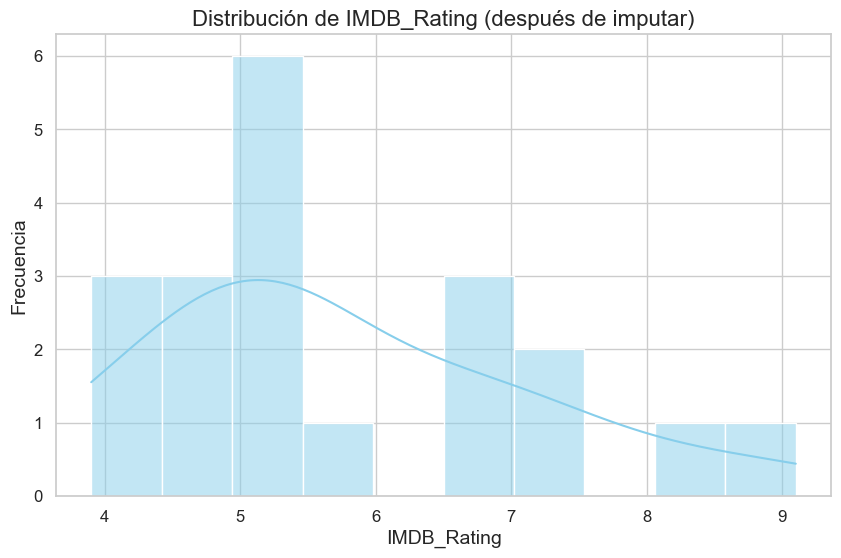

In [31]:
sns.histplot(df_movies["IMDB_Rating"], bins=10, kde=True, color="skyblue")
plt.title("Distribución de IMDB_Rating (después de imputar)")
plt.xlabel("IMDB_Rating")
plt.ylabel("Frecuencia")
plt.savefig("../images/no_null_histplot_rating.png", dpi=300)
plt.show

In [32]:
# En este caso, con tan pocos datos, no tiene sentido imputar por la mediana de rating por género, se distorsionan
# Pero en caso de tener muchos más datos, sería más que recomendable hacerlo del siguiente modo
"""
Convertir a numérico forzando errores a NaN
df_movies["IMDB_Rating"] = pd.to_numeric(df_movies["IMDB_Rating"], errors="coerce")


Imputar NaN con la mediana por cada género
df_movies["IMDB_Rating"] = df_movies.groupby("Genre")["IMDB_Rating"].transform(
    lambda x: x.fillna(x.median())
)
"""

'\nConvertir a numérico forzando errores a NaN\ndf_movies["IMDB_Rating"] = pd.to_numeric(df_movies["IMDB_Rating"], errors="coerce")\n\n\nImputar NaN con la mediana por cada género\ndf_movies["IMDB_Rating"] = df_movies.groupby("Genre")["IMDB_Rating"].transform(\n    lambda x: x.fillna(x.median())\n)\n'

# 5. Normalización columnas

In [33]:
# Se elimina la columna Ratio que se creo para imputar Revenue
df_movies = df_movies.drop(columns=["ratio"])

In [34]:
# Normalizamos nombre de columnas
df_movies.rename(columns={
    "Title": "title",
    "Year": "year",
    "Genre": "genre",
    "Budget": "budget",
    "Revenue": "revenue",
    "IMDB_Rating": "imdb_rating"
}, inplace=True)

In [35]:
print("\nPorcentaje de nulos:")
display(round(df_movies.isnull().mean() * 100, 2))


Porcentaje de nulos:


title          0.0
genre          0.0
year           0.0
budget         0.0
revenue        0.0
imdb_rating    0.0
dtype: float64

# 06. Exportar CSV limpio

In [36]:
df_movies

,title,genre,year,budget,revenue,imdb_rating
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000,1.264061e+08,5.3
5,Neon City,Comedy,2000,80000000,3.621845e+08,5.1
6,Silent Horizon,Fantasy,2006,31000000,2.556292e+07,4.1
7,Echoes of Tomorrow,Sci-Fi,2011,211000000,1.375882e+08,5.3
8,Digital Frontier,Documentary,2003,25000000,6.080356e+07,8.2
9,Whispers in the Dark,Fantasy,2019,152000000,1.782975e+08,3.9


In [37]:
df_movies.to_csv("../data/clean_movies_dataset.csv", index=False)